<a href="https://colab.research.google.com/github/Phassakorn512/CS240-termproject/blob/main/termproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Member**
นายพัศกร สงวนเชื้อ 6709616723
* มีหน้าที่ วางแผน Timeline ประสานงาน ตรวจ notebook รวมไฟล์ และตรวจความพร้อมก่อนส่ง

นางสาวณัฐณิชา จุลโพธิ์ 6709540063
* มีหน้าที่กำหนด Problem framing และบอกจุดประสงค์ของหัวข้อที่ต้องการจะค้นคว้า

นายกฤษณะพล บุญเรือง 6709681057
* มีหน้าที่บอกรายละเอียด Data Acquisition

นายนันทภพ ชนชอบธรรม 6709616582
* มีหน้าที่ทำความสะอาดข้อมูล Data cleaning

นายภูจิร ยังเหลือ 6709616806
* มีหน้าที่วิเคราะห์ข้อมูลเชิงสํารวจ (EDA) เพื่อค้นหา insights เเละ สร้างกราฟ

การิน สุภาเรือง 6709520065
* มีหน้าที่สร้างและ Train โมเดล

พัชรพล ศรีประเสริฐ 6709616707
* มีหน้าที่ Evaluate model และสรุป model ที่ดีสุด

ปวริศร์ มั่งนิมิตร 6709681115
* มีหน้าที่ วิเคราะห์ข้อมูลและผลโมเดล เพื่อสรุปปัจจัยที่มีอิทธิพลต่อคุณภาพการนอน




# **Problem Framing**

**คุณภาพการนอน (sleep quality) มีความสัมพันธ์ต่ออัตราความเครียดอย่างไร?**

หัวข้อนี้มุ่งศึกษาและทำความเข้าใจว่า การนอนหลับที่ดีหรือไม่ดี มีผลต่อ ระดับความเครียดของเราอย่างไร?

---

สมมติฐาน:
*   นอนหลับดี (คุณภาพการนอนสูง) → ความเครียดลดลงเป็นส่วนใหญ่
*   นอนหลับไม่ดี (คุณภาพการนอนต่ำ) → ความเครียดเพิ่มขึ้นเป็นส่วนใหญ่

* หมายเหตุ: ปัจจัยอื่น ๆ เช่น ชั่วโมงการนอน, ภาระการเรียน, กิจกรรมนอกหลักสูตร, ผลการเรียน จะใช้ ช่วยในโมเดลทำนาย เพื่อเพิ่มความแม่นยำ แต่ไม่ใช่ตัวแปรที่เราจะ focus วิเคราะห์โดยตรง

---

**สิ่งที่เราจะหา / วิเคราะห์**

* วิเคราะห์ความสัมพันธ์ระหว่างคุณภาพการนอนกับความเครียด

* สร้างโมเดลทำนายคุณภาพการนอนจากความเครียด

---


**สิ่งที่จะได้จากงานนี้**

Insight / Data Interpretation: เข้าใจว่าระดับความเครียดส่งผลต่อคุณภาพการนอนอย่างไร

โมเดลทำนายคุณภาพการนอน: ใช้ความเครียดและปัจจัยอื่น ๆ เป็นตัวแปร

แนวทางปรับพฤติกรรม: ข้อเสนอเพื่อปรับพฤติกรรมลดความเครียดและเพิ่มคุณภาพการนอน

---

**ความสำคัญของปัญหา:**
* การนอนหลับเป็นกิจกรรมพื้นฐานที่มนุษย์ทำทุกวัน
* คุณภาพการนอนที่ดีมีผลต่อ ร่างกาย (ฟื้นฟูกล้ามเนื้อ ระบบภูมิคุ้มกัน) และ จิตใจ (ลดความเครียด เพิ่มสมาธิ)
* การนอนไม่เพียงพอหรือคุณภาพไม่ดีส่งผลเสียต่อชีวิตประจำวัน เช่น การเรียน การทำงาน และสุขภาพจิต
* การทำความเข้าใจความสัมพันธ์นี้ช่วยให้คนทั่วไปปรับปรุงการนอน เพื่อชีวิตที่มีคุณภาพและลดความเครียด

---

**แหล่งอ้างอิง:**
https://www.kaggle.com/datasets/sidraaazam/analyzing-student-stress-factors



In [105]:
#นำเข้า kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sidraaazam/analyzing-student-stress-factors")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'analyzing-student-stress-factors' dataset.
Path to dataset files: /kaggle/input/analyzing-student-stress-factors


In [106]:
# Load module
import pandas as pd # DataFrame
import seaborn as sb # graph
import matplotlib.pyplot as plt # Plot
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.preprocessing import StandardScaler # standardize features
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.metrics import accuracy_score, classification_report # model evaluation metrics

In [107]:
import os

os.listdir(path)

['Student Stress Factors (2).csv']

# Data Acquisition

In [108]:

df = pd.read_csv(path + "/Student Stress Factors (2).csv")

df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [109]:
#Rename Column
column_map = {
    'Kindly Rate your Sleep Quality 😴': 'Sleep_Quality',
    'How many times a week do you suffer headaches 🤕?': 'Headaches',
    'How would you rate you academic performance 👩‍🎓?': 'Academic_Performance',
    'how would you rate your study load?': 'Study_Load',
    'How many times a week you practice extracurricular activities 🎾?': 'Extracurricular',
    'How would you rate your stress levels?': 'Stress_Levels'
}

df = df.rename(columns=column_map)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sleep_Quality         520 non-null    int64
 1   Headaches             520 non-null    int64
 2   Academic_Performance  520 non-null    int64
 3   Study_Load            520 non-null    int64
 4   Extracurricular       520 non-null    int64
 5   Stress_Levels         520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


**ข้อมูลคุณลักษณะ**

* Kindly Rate your Sleep Quality 😴(Sleep_Quality): คุณภาพการนอน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* How many times a week do you suffer headaches 🤕(Headaches): ความถี่ของการปวดศีรษะ ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate you academic performance 👩‍🎓(Academic_Performance): ระดับผลการเรียน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* how would you rate your study load?(Sutdy_Load): ระดับภาระการเรียน ของนักเรียน [ระดับคะแนน: 1 (เบาที่สุด) ถึง 5 (หนักที่สุด)]

* How many times a week you practice extracurricular activities 🎾(Extracurricular): ความถี่ของการทำกิจกรรมนอกหลักสูตร ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate your stress levels?(Stress_Levels): ระดับความเครียด ของนักเรียน [ระดับคะแนน: 1 (น้อยที่สุด) ถึง 5 (มากที่สุด)]

#Data Preparation

Data Cleaning



หาค่าตัวที่ซ้ำกัน (Duplicate)

In [111]:
print(f"จำนวนแถว: {len(df)}")

จำนวนแถว: 520


In [112]:
duplicate_rows = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำซ้อน: {duplicate_rows}")

จำนวนแถวที่ซ้ำซ้อน: 416


ข้อมูลซ้ำกันเป็นเพราะ ข้อมูลชุดนี้แสดงผลเป็นตัวเลข

In [113]:
#หาจำนวน ตัวซ้ำ duplicate ถ้าซ้ำจะแสดงเป็น true
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
515,True
516,True
517,True
518,True


หา Missing Data

In [114]:
#หาmissingdata
print(df.isnull().sum())

Sleep_Quality           0
Headaches               0
Academic_Performance    0
Study_Load              0
Extracurricular         0
Stress_Levels           0
dtype: int64


Handling Outliers

In [115]:
#หา outlier
Q1 = df.quantile(0.25)#หาq1
Q3 = df.quantile(0.75)#หาq1

IQR = Q3-Q1 #หาพิสัยระหว่างquantile
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [116]:
#หาค่านอกเกณฑ์ทางลบ
print(lower_bound)

Sleep_Quality          -1.0
Headaches              -2.0
Academic_Performance    1.5
Study_Load             -1.0
Extracurricular        -3.5
Stress_Levels          -1.0
dtype: float64


In [117]:
print("Sleep_Quality",(df["Sleep_Quality"]<-1.0).sum()) #
print("Headaches",(df["Headaches"]<-2.0).sum())
print("Academic_Performance",(df["Academic_Performance"]<1.5).sum())
print("Study_Load",(df["Study_Load"]<1.0).sum())
print("Extracurricular",(df["Extracurricular"]<-3.5).sum())
print("Stress_Levels",(df["Stress_Levels"]<-1.0).sum())

Sleep_Quality 0
Headaches 0
Academic_Performance 35
Study_Load 0
Extracurricular 0
Stress_Levels 0


In [118]:
#หาค่านอกเกณฑ์ทางบวก
print(upper_bound)

Sleep_Quality           7.0
Headaches               6.0
Academic_Performance    5.5
Study_Load              7.0
Extracurricular         8.5
Stress_Levels           7.0
dtype: float64


In [119]:
print("Sleep_Quality",(df["Sleep_Quality"]>7.0).sum()) #
print("Headaches",(df["Headaches"]>6.0).sum())
print("Academic_Performance",(df["Academic_Performance"]>5.5).sum())
print("Study_Load",(df["Study_Load"]>7.0).sum())
print("Extracurricular",(df["Extracurricular"]>8.5).sum())
print("Stress_Levels",(df["Stress_Levels"]>7.0).sum())

Sleep_Quality 0
Headaches 0
Academic_Performance 0
Study_Load 0
Extracurricular 0
Stress_Levels 0


In [120]:
#รวมค่านอกเกณฑ์ทั้งหมด
outliers = ((df < lower_bound) | (df > upper_bound))
print(outliers.sum())

Sleep_Quality            0
Headaches                0
Academic_Performance    35
Study_Load               0
Extracurricular          0
Stress_Levels            0
dtype: int64


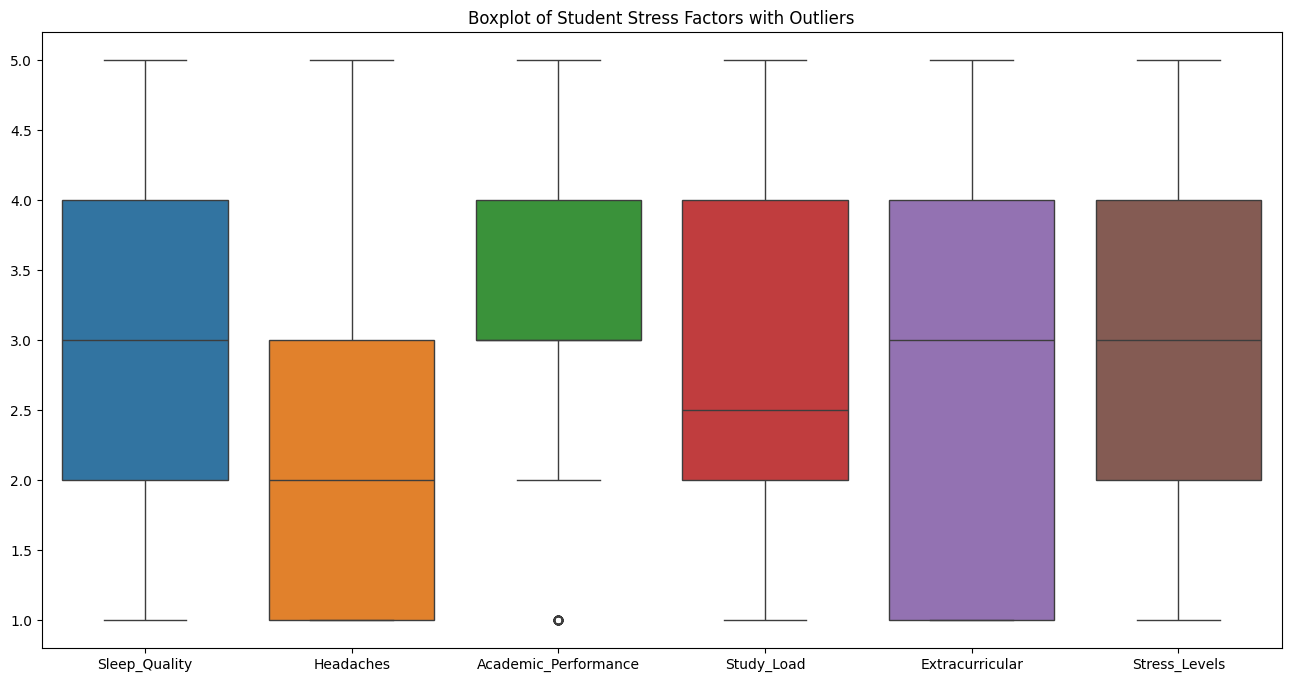

In [121]:
# ทำแผนภาพกล่อง Boxplot ก่อนจัดการ outliers

plt.figure(figsize=(16, 8))
sb.boxplot(data=df)
plt.xticks(rotation=0)
plt.title('Boxplot of Student Stress Factors with Outliers')
plt.show()

In [122]:
#outliers ทั้งหมดของ Academic_Performance
outlier_mask = (df['Academic_Performance'] < lower_bound["Academic_Performance"]) | (df['Academic_Performance'] > upper_bound["Academic_Performance"])
print(df[outlier_mask]['Academic_Performance'])

4      1
6      1
7      1
17     1
36     1
49     1
83     1
108    1
110    1
111    1
121    1
140    1
153    1
187    1
212    1
214    1
215    1
225    1
244    1
257    1
291    1
316    1
318    1
319    1
329    1
348    1
361    1
395    1
420    1
422    1
423    1
433    1
452    1
465    1
499    1
Name: Academic_Performance, dtype: int64


Capping คือการ แทนที่ ค่าผิดปกติที่อยู่ภายนอกขอบเขตที่กำหนดด้วย ค่าขอบเขต (Boundary Value) ที่ใกล้ที่สุด

In [123]:
# Capping Outliers ในคอลัมน์ Academic_Performance
# แทนที่ค่าที่สูงกว่า upper_bound ด้วย upper_bound
df.loc[df['Academic_Performance'] > upper_bound["Academic_Performance"], 'Academic_Performance'] = upper_bound["Academic_Performance"]

# แทนที่ค่าที่ต่ำกว่า lower_bound ด้วย lower_bound
df.loc[df['Academic_Performance'] < lower_bound["Academic_Performance"], 'Academic_Performance'] = lower_bound["Academic_Performance"]

print("Outliers ได้รับการจัดการเรียบร้อยแล้วด้วยวิธี Capping.")

Outliers ได้รับการจัดการเรียบร้อยแล้วด้วยวิธี Capping.


/tmp/ipython-input-857473446.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Academic_Performance'] > upper_bound["Academic_Performance"], 'Academic_Performance'] = upper_bound["Academic_Performance"]


In [124]:
# ตรวจสอบการนับ Outliers หลังการจัดการ
outliers_after_capping = ((df['Academic_Performance'] < lower_bound["Academic_Performance"]) | (df['Academic_Performance'] > upper_bound["Academic_Performance"])).sum()

print(f"จำนวน Outliers ใน Academic_Performance หลังการทำ Capping: {outliers_after_capping}")
# ผลลัพธ์ควรจะเป็น: 0

จำนวน Outliers ใน Academic_Performance หลังการทำ Capping: 0


In [125]:
#รวมค่านอกเกณฑ์ทั้งหมด
outliers = ((df < lower_bound) | (df > upper_bound))
print(outliers.sum())

Sleep_Quality           0
Headaches               0
Academic_Performance    0
Study_Load              0
Extracurricular         0
Stress_Levels           0
dtype: int64


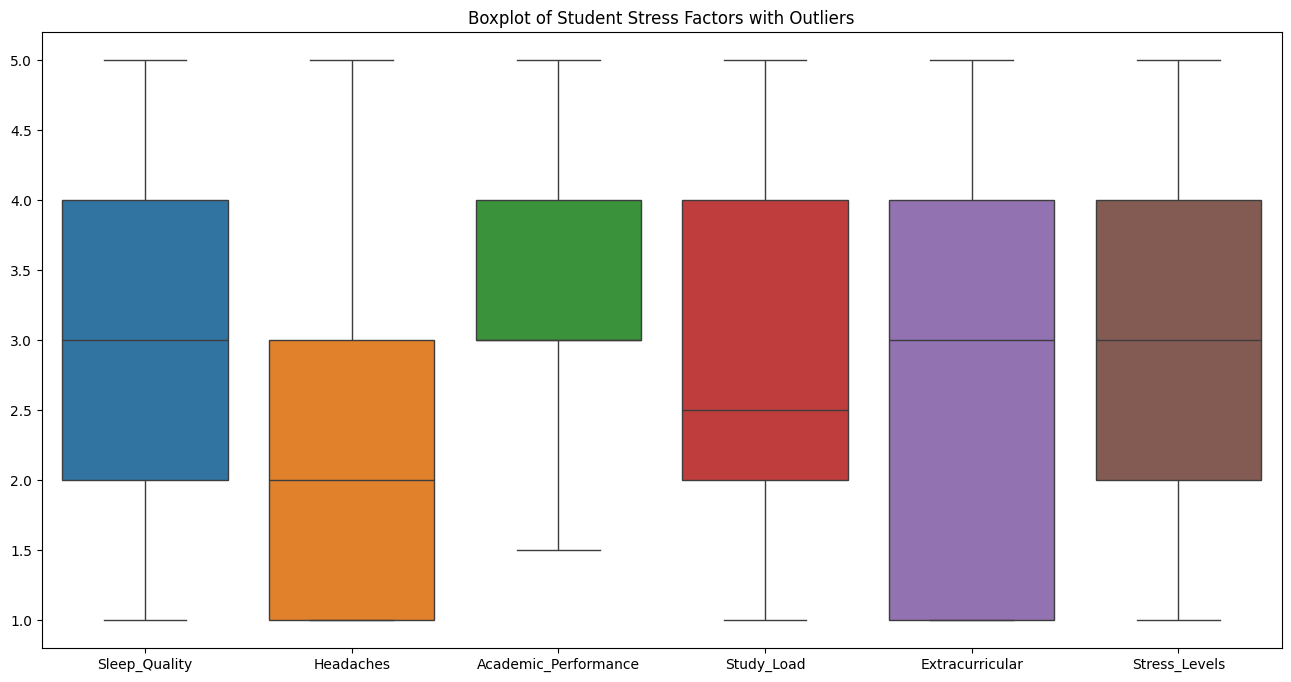

In [126]:
# ทำแผนภาพกล่อง Boxplot หลังจัดการ outliers

plt.figure(figsize=(16, 8))
sb.boxplot(data=df)
plt.xticks(rotation=0)
plt.title('Boxplot of Student Stress Factors with Outliers')
plt.show()

Standardization

In [127]:
features_to_scale = ["Sleep_Quality", "Headaches", "Academic_Performance",
                     "Study_Load", "Extracurricular", "Stress_Levels"]

scaler = MinMaxScaler()

# แปลงข้อมูล
scaled_data = scaler.fit_transform(df[features_to_scale])

# แสดงผลลัพธ์ (อยู่ระหว่าง 0 - 1)
print("ข้อมูลหลังทำ Standardization (ค่าอยู๋ระหว่าง 0 - 1):")
print(pd.DataFrame(scaled_data, columns=features_to_scale).head())

ข้อมูลหลังทำ Standardization (ค่าอยู๋ระหว่าง 0 - 1):
   Sleep_Quality  Headaches  Academic_Performance  Study_Load  \
0           0.50       0.00              0.428571        0.75   
1           0.75       0.00              0.142857        0.50   
2           0.25       0.00              0.142857        0.00   
3           0.50       0.25              0.428571        0.25   
4           0.25       0.50              0.000000        1.00   

   Extracurricular  Stress_Levels  
0             0.25           0.50  
1             0.50           0.25  
2             0.75           0.75  
3             0.50           0.50  
4             1.00           0.50  


#EDA

In [128]:
#ตารางแจกแจงความถี่และความถี่สัมพัทธ์ ของ Sleep_Quality
frequency_table = df['Sleep_Quality'].value_counts()
relative_frequency_table = df['Sleep_Quality'].value_counts(normalize=True) * 100
relative_frequency_table = relative_frequency_table.round(2)
relative_frequency_table.name = 'Relative Frequency (%)'

#แสดงผลตารางความถี่
print("--- ตารางความถี่ (Frequency) ---")
print(frequency_table)
print("\n--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---")
print(relative_frequency_table)

--- ตารางความถี่ (Frequency) ---
Sleep_Quality
3    185
4    120
2    115
5     65
1     35
Name: count, dtype: int64

--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---
Sleep_Quality
3    35.58
4    23.08
2    22.12
5    12.50
1     6.73
Name: Relative Frequency (%), dtype: float64


In [129]:
#Median and Mode of Sleep_Quality
# 1. หา Median (มัธยฐาน)
median_value = df['Sleep_Quality'].median()
print(f"Median (มัธยฐาน) ของ Sleep_Quality: {median_value}")

# 2. หา Mode (ฐานนิยม)
mode_value = df['Sleep_Quality'].mode()[0]
print(f"Mode (ฐานนิยม) ของ Sleep_Quality: {mode_value}")

Median (มัธยฐาน) ของ Sleep_Quality: 3.0
Mode (ฐานนิยม) ของ Sleep_Quality: 3


จากตารางแจกแจงความถี่, ฐานนิยมและมัธยฐาน

คุณภาพการนอนส่วนใหญ่จะอยู่ในระดับ 3 หรือปานกลาง

In [130]:
#ตารางแจกแจงความถี่และความถี่สัมพัทธ์ ของ Stress_Levels
frequency_table = df['Stress_Levels'].value_counts()
relative_frequency_table = df['Stress_Levels'].value_counts(normalize=True) * 100
relative_frequency_table = relative_frequency_table.round(2)
relative_frequency_table.name = 'Relative Frequency (%)'

#แสดงผลตารางความถี่
print("--- ตารางความถี่ (Frequency) ---")
print(frequency_table)
print("\n--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---")
print(relative_frequency_table)

--- ตารางความถี่ (Frequency) ---
Stress_Levels
3    125
1    110
2    105
4    100
5     80
Name: count, dtype: int64

--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---
Stress_Levels
3    24.04
1    21.15
2    20.19
4    19.23
5    15.38
Name: Relative Frequency (%), dtype: float64


In [131]:
#Median and Mode of Stress_Levels
# 1. หา Median (มัธยฐาน)
median_value = df['Stress_Levels'].median()
print(f"Median (มัธยฐาน) ของ Stress_Levels: {median_value}")

# 2. หา Mode (ฐานนิยม)
mode_value = df['Stress_Levels'].mode()[0]
print(f"Mode (ฐานนิยม) ของ Stress_Levels: {mode_value}")

Median (มัธยฐาน) ของ Stress_Levels: 3.0
Mode (ฐานนิยม) ของ Stress_Levels: 3


จากตารางแจกแจงความถี่, ฐานนิยมและมัธยฐาน

ระดับความเครียดส่วนใหญ่จะอยู่ในระดับ 3 หรือปานกลาง

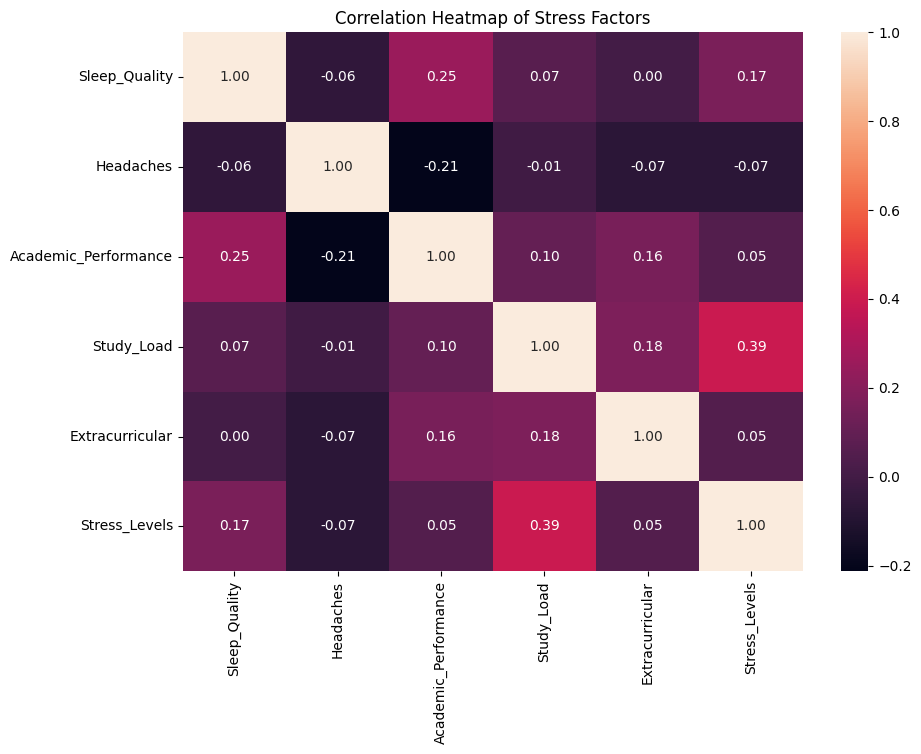

In [132]:
# สร้างกราฟ Heatmap แสดงค่า Correlation ของ Stress Factors
corr = df.corr()
plt.figure(figsize=(10, 7))
sb.heatmap(corr, annot=True , fmt='.2f')
plt.title('Correlation Heatmap of Stress Factors')
plt.show()

เราสามารถสรุป "ปัจจัยความเครียด" (Stress Factors) ได้ดังนี้:

ความสัมพันธ์ที่ชัดเจนที่สุด (สีชมพูเข้มสุด):

Study_Load (ภาระการเรียน) กับ Stress_Levels (ระดับความเครียด) มีค่า 0.39

แปลว่า: ยิ่งมีภาระการเรียนหนัก (Study_Load สูง) ก็ยิ่งมีแนวโน้มที่จะเครียดมาก (Stress_Levels สูง) นี่คือความสัมพันธ์ทางบวกที่ชัดเจนที่สุดในตารางนี้

ความสัมพันธ์แบบสวนทางที่ชัดที่สุด (สีเกือบมืด):

Academic_Performance (ผลการเรียน) กับ Headaches (อาการปวดหัว) มีค่า -0.21

แปลว่า: คนที่ผลการเรียนดี มีแนวโน้มที่จะปวดหัวน้อยกว่า (หรือกลับกันคือ คนที่ปวดหัวบ่อยๆ อาจส่งผลเสียต่อผลการเรียน)

ประเด็นน่าสนใจอื่นๆ:

Sleep_Quality (คุณภาพการนอน) สัมพันธ์ทางบวกกับ Academic_Performance (ผลการเรียน) (ค่า 0.25)

แปลว่า: ยิ่งนอนมีคุณภาพ ผลการเรียนก็ยิ่งมีแนวโน้มจะดีขึ้น

Extracurricular (กิจกรรมนอกหลักสูตร) แทบไม่สัมพันธ์กับ Stress_Levels (ความเครียด) (ค่า 0.05)

แปลว่า: ในชุดข้อมูลนี้ การทำกิจกรรมนอกหลักสูตรไม่ได้ทำให้เครียดเพิ่มขึ้นอย่างชัดเจน

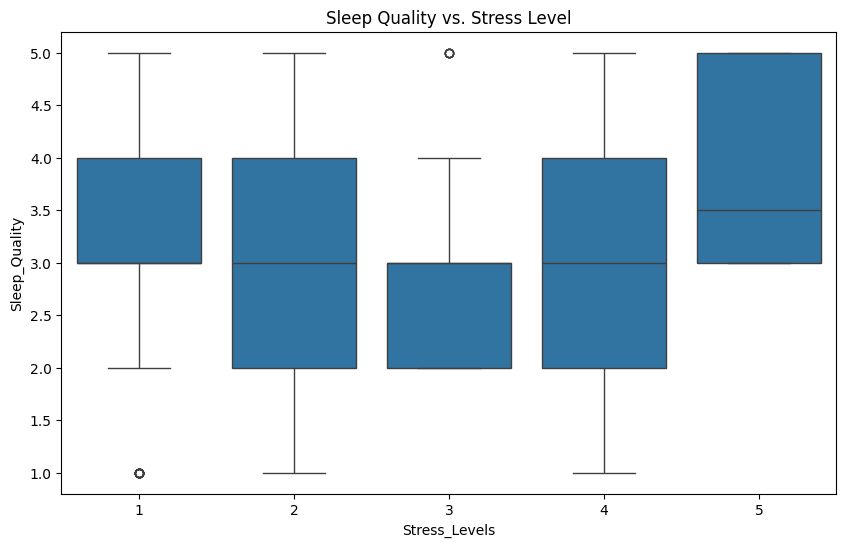

In [133]:
# สร้างกราฟ boxplot โดยให้ Stress Level (แกน X) เทียบกับ Sleep Qualityl (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Stress_Levels', y='Sleep_Quality', data=df)
plt.title('Sleep Quality vs. Stress Level')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง ระดับความเครียด (Stress Levels) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

จากกราฟจะเห็นได้ว่า ผลลัพธ์ที่ได้นั้น "สวนทาง" กับสมมติฐาน (Problem Framing) ของเราอย่างชัดเจน:

กลุ่มที่เครียดน้อยที่สุด (Stress Level = 1): มีค่ามัธยฐาน (เส้นกลางกล่อง) ของคุณภาพการนอนอยู่ที่ ระดับ 3.0

ในขณะที่กลุ่มที่เครียดมากที่สุด (Stress Level = 5): ค่ามัธยฐานของคุณภาพการนอนกลับ "สูงขึ้น" ไปอยู่ที่ ระดับ 3.5

สรุป (Insight): ข้อมูลนี้สะท้อนว่า นักเรียนกลุ่มที่เครียดมากที่สุด กลับมีแนวโน้มคุณภาพการนอน "ดีกว่า" กลุ่มที่เครียดน้อยที่สุด

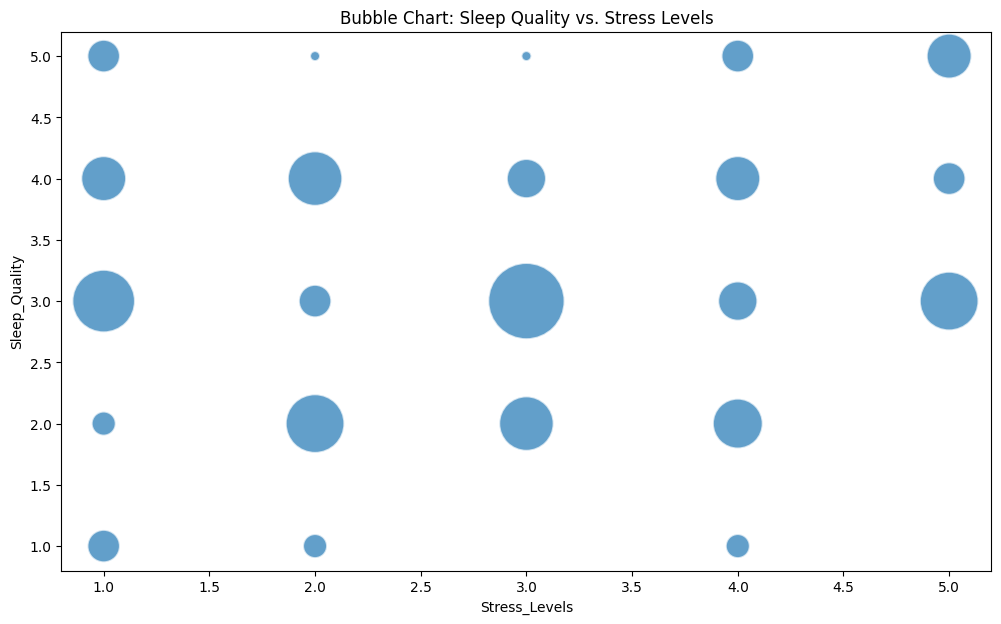

In [134]:
# สร้างกราฟ Bubble Chart โดยให้ Stress Level (แกน X) เทียบกับ Sleep Quality (แกน Y)
# (นี่คือการพล็อตแบบ Y = Target, X = Feature ซึ่งถูกต้องตาม Model Planning)

# 1. สร้างตารางนับจำนวน (Aggregate)

df_counts = df.groupby(['Stress_Levels', 'Sleep_Quality']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))


sb.scatterplot(
    x='Stress_Levels',  # <-- (Feature อยู่แกน X)
    y='Sleep_Quality',  # <-- (Target อยู่แกน Y)
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)
# ------------------------------------

plt.title('Bubble Chart: Sleep Quality vs. Stress Levels')
plt.show()

กราฟ Bubble Chart นี้ (แกน X=Stress, แกน Y=Sleep, ขนาด=จำนวนคน) ยืนยัน Insight ที่ "สวนทาง" กับสมมติฐานของเรา

โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน” ที่มีค่าความเครียดและคุณภาพการนอนอยู่ในระดับเดียวกัน ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคนในแต่ละกลุ่มข้อมูล


หักล้างสมมติฐาน: เรา "ไม่" เห็นฟองขนาดใหญ่ที่มุม "ขวาล่าง" (ที่คาดว่า เครียดมาก=นอนแย่)

ยืนยัน Insight ใหม่: เรากลับเห็นฟอง (Bubble) ที่ชัดเจนในมุม "ขวาบน" (เช่น Stress=5, Sleep=3.5) ซึ่งสอดคล้องกับ Box Plot ที่เราวิเคราะห์ไป

สรุป: กราฟนี้พิสูจน์ว่ามีนักเรียนกลุ่มที่ "เครียดมาก แต่ก็นอนดี" อยู่จริง



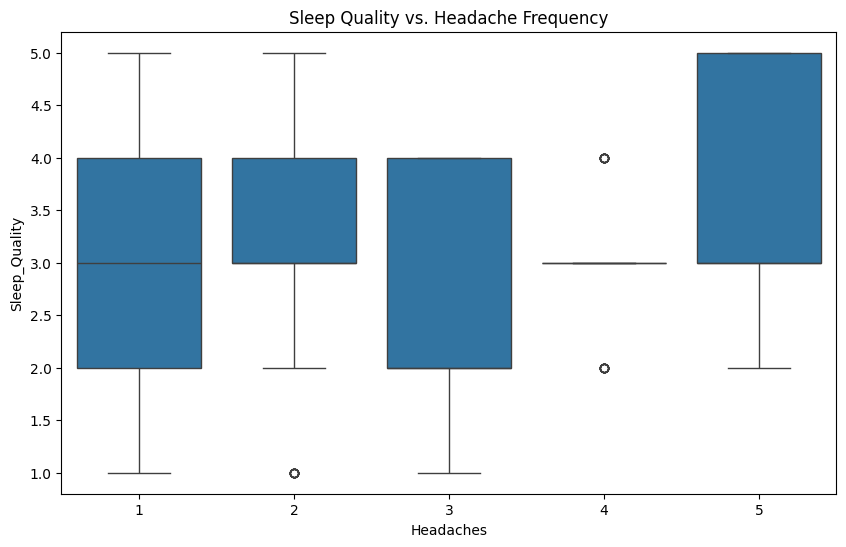

In [135]:
# สร้างกราฟ boxplot โดยให้ Headache Frequency (แกน X) เทียบกับ Sleep Quality (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Headaches', y="Sleep_Quality", data=df)
plt.title('Sleep Quality vs. Headache Frequency')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง ความถี่ของอาการปวดหัว (Headaches) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

จากกราฟจะเห็นได้ว่า:

กลุ่มที่ปวดหัวน้อยที่สุด (Headaches = 1): มีค่ามัธยฐาน (เส้นกลางกล่อง) ของคุณภาพการนอนอยู่ที่ ระดับ 3.0

ในขณะที่กลุ่มที่ปวดหัวมากที่สุด (Headaches = 5): ค่ามัธยฐานของคุณภาพการนอนกลับ "สูงขึ้น" ไปอยู่ที่ ระดับ 4.0

สรุป (Insight): ข้อมูลนี้สะท้อนว่า นักเรียนกลุ่มที่ปวดหัวบ่อยครั้ง กลับมีแนวโน้มคุณภาพการนอน "ดีกว่า" กลุ่มที่ปวดหัวน้อยกว่า ซึ่งเป็น Insight ที่ "สวนทาง" กับสิ่งที่เราอาจคาดการณ์ไว้ และยัง "สวนทาง" กับค่า Correlation (-0.07) ที่เราพบใน Heatmap อย่างน่าสนใจ แสดงให้เห็นว่าปัจจัยเหล่านี้มีความซับซ้อนมากกว่าที่คิด

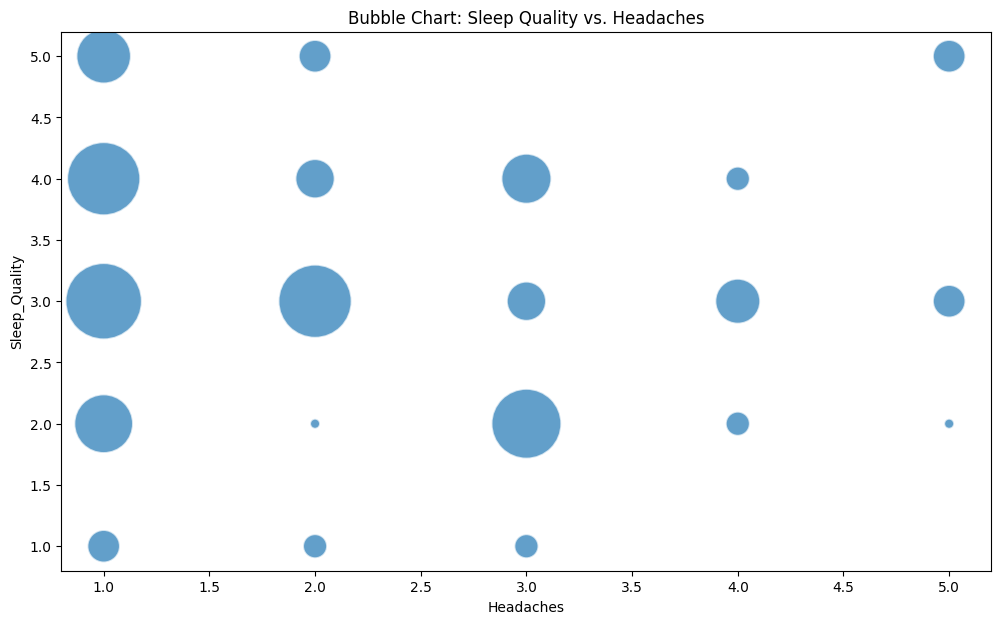

In [136]:
# สร้างกราฟ Bubble Chart โดยให้ Headaches (แกน X) เทียบกับ Sleep Quality (แกน Y)
# (นี่คือการพล็อตแบบ Y = Target, X = Feature)

# 1. สร้างตารางนับจำนวน (Aggregate)
df_counts = df.groupby(['Headaches', 'Sleep_Quality']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))

sb.scatterplot(
    x='Headaches',      # <-- (Feature อยู่แกน X)
    y='Sleep_Quality',  # <-- (Target อยู่แกน Y)
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)
# ------------------------------------

plt.title('Bubble Chart: Sleep Quality vs. Headaches')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง ความถี่ของอาการปวดหัว (Headaches) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน”... ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคน...”

เมื่อพิจารณากราฟ (ซึ่ง "สอดคล้อง" กับสมมติฐานของเรา):

ฟองที่อยู่ทาง "ด้านซ้าย" (Headaches = 1): ฟองขนาดใหญ่จะอยู่ "สูง" (เช่น ที่ Sleep Quality = 4.0)

ฟองที่อยู่ทาง "ด้านขวา" (Headaches = 5): ฟองจะอยู่ "ต่ำลง" (เช่น ที่ Sleep Quality = 3.0)

สรุป (Insight): กราฟนี้แสดงแนวโน้ม "ทางลบ" (Negative Correlation)  อย่างชัดเจน... สะท้อนว่า นักเรียนที่ ปวดหัวน้อย (X=1) มีแนวโน้มคุณภาพการนอนดีกว่า (Y=4.0) ในทางกลับกัน นักเรียนที่ ปวดหัวบ่อย (X=5) มีแนวโน้มคุณภาพการนอนที่แย่ลง (Y=3.0)

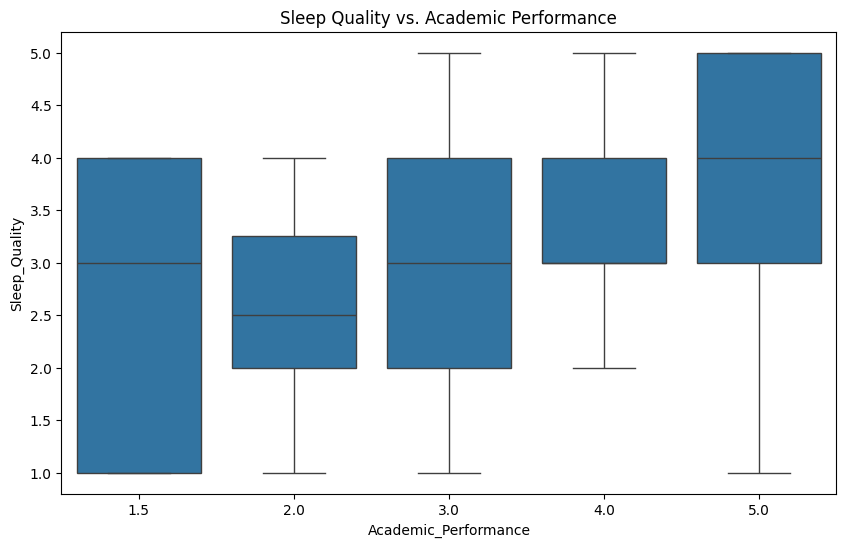

In [137]:
# สร้างกราฟ boxplot โดยให้ Academic Perfomance  (แกน X) เทียบกับ Sleep Quality (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Academic_Performance', y='Sleep_Quality', data=df)
plt.title('Sleep Quality vs. Academic Performance')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง ผลการเรียน (Academic Performance) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

จากกราฟจะเห็นได้ว่า (ซึ่งสอดคล้องกับ Heatmap ที่ +0.25):

กลุ่มที่ "ผลการเรียนดีที่สุด" (Academic Performance = 5): มีค่ามัธยฐาน (เส้นกลางกล่อง) ของคุณภาพการนอนอยู่ที่ ระดับ 4.0 ซึ่ง "สูงที่สุด" ในทุกกลุ่ม

ในขณะที่กลุ่มที่มี "ผลการเรียนระดับอื่นๆ" (Academic Performance = 1.5, 2, 3, 4): ค่ามัธยฐานของคุณภาพการนอนจะอยู่ในระดับที่ "ต่ำกว่า" (อยู่ที่ 3.0, 2.5, 3.0, 3.0 ตามลำดับ)

สรุป (Insight): ข้อมูลนี้สะท้อนว่า นักเรียนกลุ่มที่ผลการเรียนดีที่สุด มีแนวโน้มคุณภาพการนอน "ดีที่สุด" อย่างชัดเจน ซึ่งแสดงถึงความสัมพันธ์ทางบวก (Positive) ตามที่ Heatmap ได้ระบุไว้

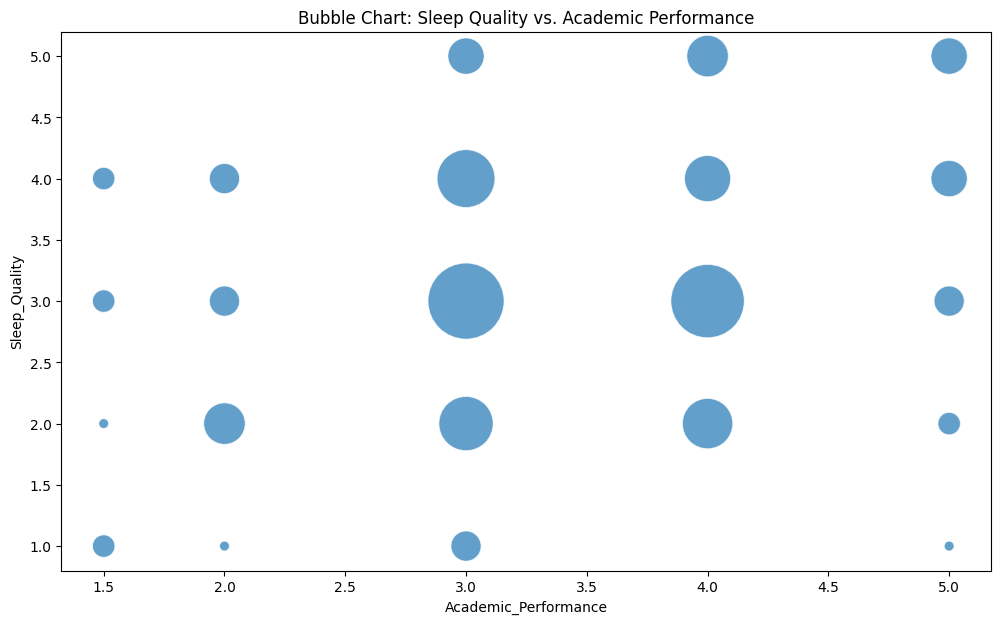

In [138]:
# สร้างกราฟ Bubble Chart โดยให้ Academic_Performance (แกน X) เทียบกับ Sleep Quality (แกน Y)
# (นี่คือการพล็อตแบบ Y = Target, X = Feature)

# 1. สร้างตารางนับจำนวน (Aggregate)
df_counts = df.groupby(['Academic_Performance', 'Sleep_Quality']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))

sb.scatterplot(
    x='Academic_Performance',  # <-- (Feature อยู่แกน X)
    y='Sleep_Quality',         # <-- (Target อยู่แกน Y)
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)
# ------------------------------------

plt.title('Bubble Chart: Sleep Quality vs. Academic Performance')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง ผลการเรียน (Academic Performance) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน”... ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคน...”

เมื่อพิจารณากราฟ (ซึ่งแสดงแนวโน้ม "ทางบวก" (Positive) ↗️ อย่างชัดเจน):

ฟองที่อยู่ทาง "ด้านขวา" (Academic Performance = 5): มีฟองขนาดใหญ่ที่ "ด้านบน" (Sleep Quality = 5)

ฟองที่อยู่ทาง "ด้านซ้าย" (Academic Performance = 1.5, 2): ฟองจะกระจายตัวอยู่ "ต่ำกว่า" (เช่น ที่ Sleep Quality = 1.0 หรือ 3.0)

ฟองที่ "หนาแน่นที่สุด" (ใหญ่สุด) มักจะอยู่ตรงกลาง (เช่น Academic=3.0, Sleep=3.0)

สรุป (Insight): กราฟนี้สะท้อนว่า นักเรียนที่ ผลการเรียนดีที่สุด (X=5) มีแนวโน้มคุณภาพการนอนดีที่สุด (Y=5) เช่นกัน ในขณะที่นักเรียนที่ผลการเรียนต่ำกว่า (X=1.5, 2) ก็มีแนวโน้มการนอนที่ต่ำกว่า ซึ่งสอดคล้องกับ Heatmap (+0.25)

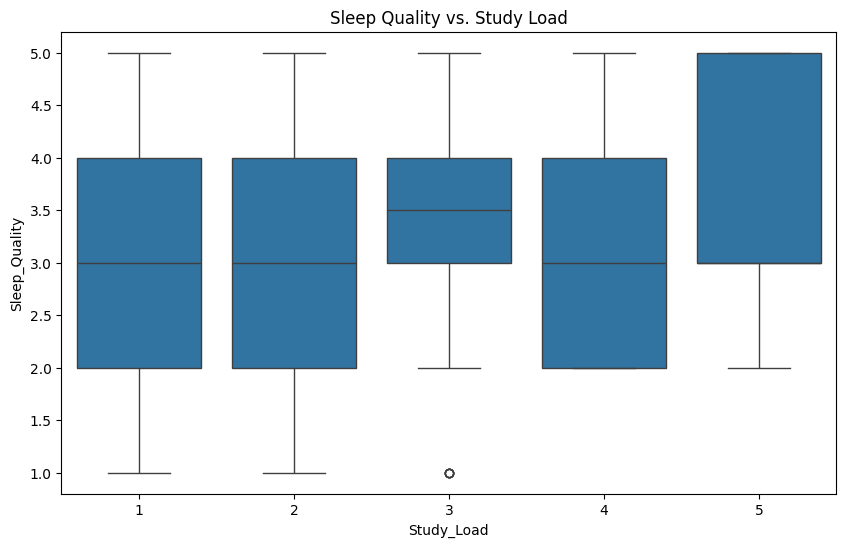

In [139]:
# สร้างกราฟ boxplot โดยให้ Study Load (แกน X) เทียบกับ Sleep Quality (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Study_Load', y='Sleep_Quality', data=df)
plt.title('Sleep Quality vs. Study Load')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง ภาระการเรียน (Study Load) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)


จากกราฟจะเห็นได้ว่า (ซึ่งสอดคล้องกับ Heatmap ที่ +0.07 ซึ่งถือว่าน้อยมาก):

ความสัมพันธ์ระหว่างสองปัจจัยนี้ "ไม่ชัดเจน" (Inconclusive) เท่าปัจจัยอื่น

กลุ่มที่มีภาระการเรียน (Study Load) ในระดับ 1, 2, 4, และ 5 ล้วนมีค่ามัธยฐาน (เส้นกลางกล่อง) ของคุณภาพการนอนอยู่ที่ ระดับ 3.0 เท่ากันทั้งหมด

มีเพียงกลุ่มที่ Study_Load = 3 เท่านั้น ที่มีค่ามัธยฐาน "สูงขึ้น" แตกต่างจากกลุ่มอื่น (อยู่ที่ ระดับ 3.5)

สรุป (Insight): ข้อมูลนี้สะท้อนว่า "ภาระการเรียน" (Study Load) อาจไม่ใช่ปัจจัยหลักที่ส่งผลต่อคุณภาพการนอนโดยตรง เนื่องจากค่ามัธยฐานของการนอนค่อนข้างคงที่ (อยู่ที่ 3.0) ในเกือบทุกระดับของภาระการเรียน (ยกเว้นกลุ่ม 3)

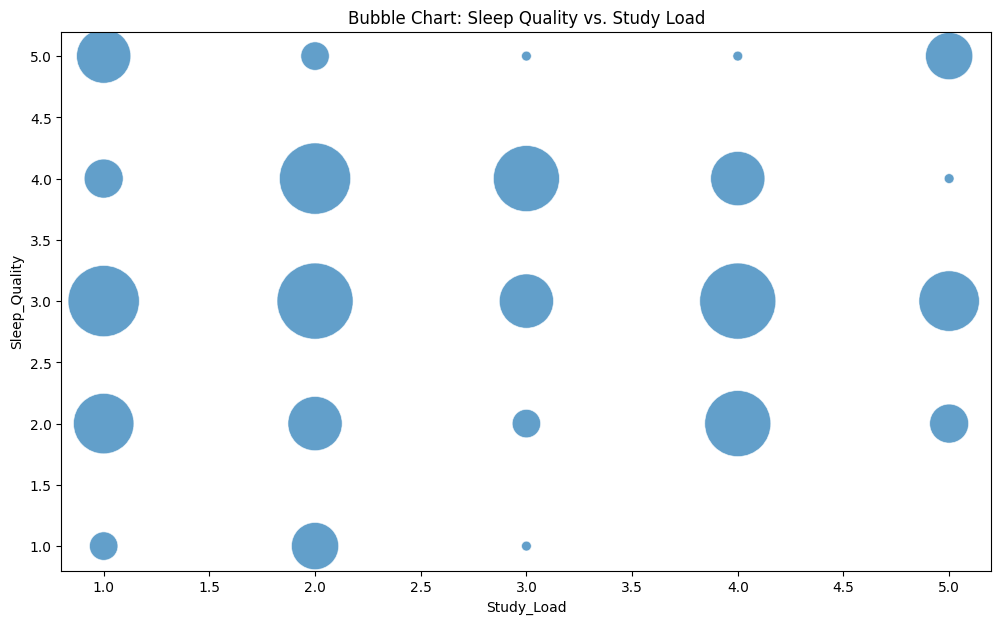

In [140]:
# สร้างกราฟ Bubble Chart โดยให้ Study_Load (แกน X) เทียบกับ Sleep Quality (แกน Y)
# (นี่คือการพล็อตแบบ Y = Target, X = Feature)

# 1. สร้างตารางนับจำนวน (Aggregate)

df_counts = df.groupby(['Study_Load', 'Sleep_Quality']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))

sb.scatterplot(
    x='Study_Load',     # <-- (Feature อยู่แกน X)
    y='Sleep_Quality',  # <-- (Target อยู่แกน Y)
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)
# ------------------------------------

plt.title('Bubble Chart: Sleep Quality vs. Study Load')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง ภาระการเรียน (Study Load) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน”... ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคน...”

เมื่อพิจารณากราฟ (ซึ่งสอดคล้องกับ Heatmap ที่ +0.07):

"ไม่มีแนวโน้มที่ชัดเจน" (No Clear Trend) กราฟไม่พุ่งขึ้น ↗️ หรือดิ่งลง ↘️

ฟองขนาดใหญ่ (กลุ่มนักเรียนที่หนาแน่น) กระจายตัวอยู่ที่ Sleep Quality ระดับ 3.0 และ 4.0 โดยปรากฏอยู่ใน "ทุกระดับ" ของ Study Load (ตั้งแต่ X=1 ถึง X=5)

สรุป (Insight): กราฟนี้สะท้อนว่า "ภาระการเรียน" (Study Load) "ไม่มี" ความสัมพันธ์ที่ชัดเจน หรือ "ไม่ได้" ส่งผลกระทบต่อ "คุณภาพการนอน" (Sleep Quality) ซึ่งสอดคล้องกับ Box Plot ที่เราเห็นว่า "แบน" (Flat)

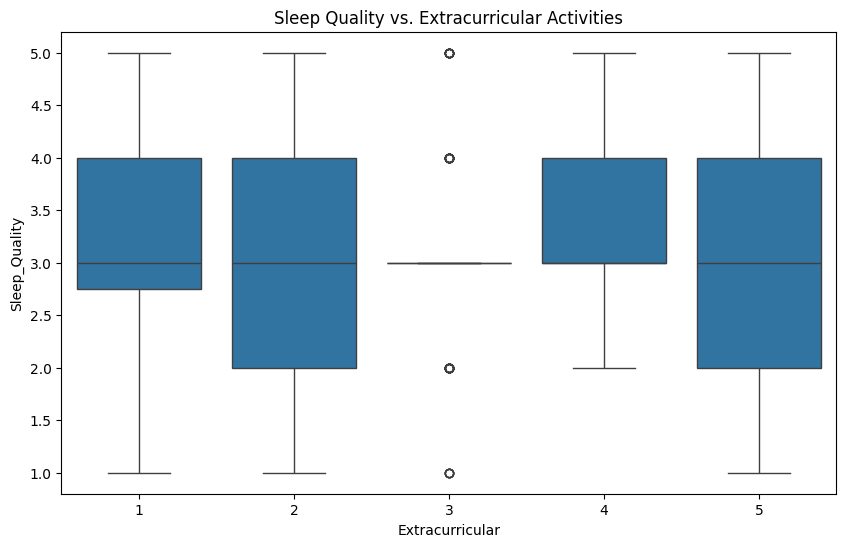

In [141]:
# สร้างกราฟ boxplot โดยให้ Extracurricular Activities (แกน X) เทียบกับ Sleep Quality (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Extracurricular', y='Sleep_Quality', data=df)
plt.title('Sleep Quality vs. Extracurricular Activities')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง การเข้าร่วมกิจกรรมนอกหลักสูตร (Extracurricular) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y)

จากกราฟจะเห็นได้ว่า (ซึ่งสอดคล้องกับ Heatmap ที่ค่า Correlation เป็น 0.00):

ความสัมพันธ์ระหว่างสองปัจจัยนี้ "ไม่มีเลย" (No Correlation)

ค่ามัธยฐาน (เส้นกลางกล่อง) ของคุณภาพการนอน "คงที่" (Flat) อยู่ที่ระดับ 3.0 ในเกือบทุกกลุ่ม (กลุ่ม 2, 3, 4, และ 5)

(มีเพียงกลุ่ม Extracurricular = 1 ที่ค่ามัธยฐานต่ำกว่าเล็กน้อยที่ ~2.8)

สรุป (Insight): ข้อมูลนี้สะท้อนว่า การทำกิจกรรมนอกหลักสูตร "ไม่มี" ความสัมพันธ์ที่ชัดเจน หรือ "ไม่ได้" ส่งผลกระทบต่อคุณภาพการนอนของนักเรียนในข้อมูลชุดนี้เลย

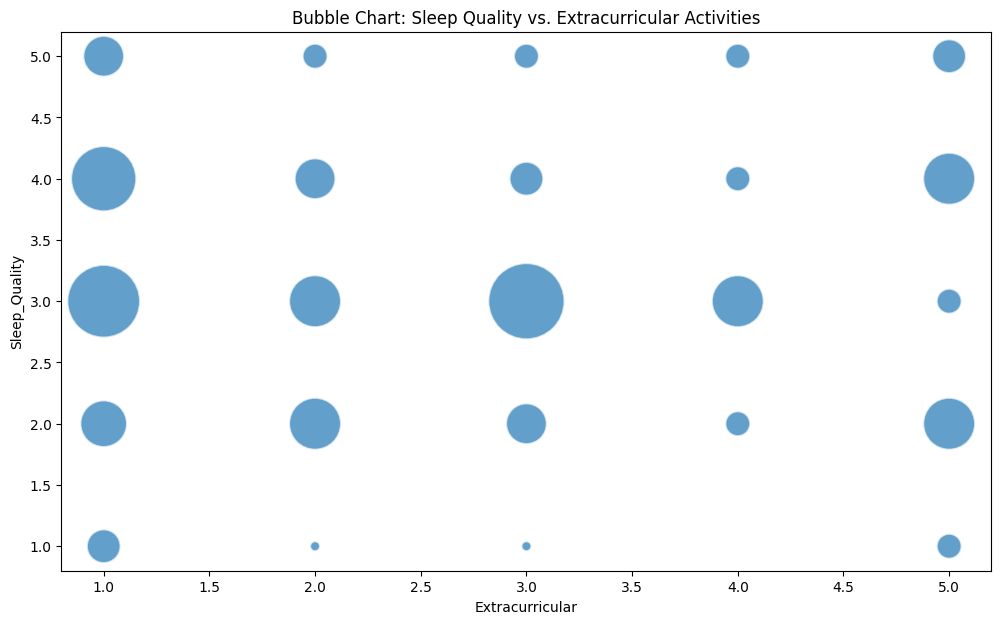

In [142]:
# สร้างกราฟ Bubble Chart โดยให้ Extracurricular (แกน X) เทียบกับ Sleep Quality (แกน Y)
# (นี่คือการพล็อตแบบ Y = Target, X = Feature)

# 1. สร้างตารางนับจำนวน (Aggregate)

df_counts = df.groupby(['Extracurricular', 'Sleep_Quality']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))


sb.scatterplot(
    x='Extracurricular', # <-- (Feature อยู่แกน X)
    y='Sleep_Quality',   # <-- (Target อยู่แกน Y)
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)
# ------------------------------------

plt.title('Bubble Chart: Sleep Quality vs. Extracurricular Activities')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง การเข้าร่วมกิจกรรมนอกหลักสูตร (Extracurricular) (แกน X) และ คุณภาพการนอน (Sleep Quality) (แกน Y) ซึ่งสอดคล้องกับ "Model Planning" (Y=Target, X=Feature) ของเรา

โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน”... ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคน...”

เมื่อพิจารณากราฟ (ซึ่งสอดคล้องกับ Heatmap ที่ 0.00):

"ไม่มีแนวโน้มที่ชัดเจน" (No Clear Trend) กราฟไม่พุ่งขึ้น หรือดิ่งลง

ฟองขนาดใหญ่ (กลุ่มนักเรียนที่หนาแน่น) กระจายตัวอยู่ที่ Sleep Quality ระดับ 3.0 โดยปรากฏอยู่ใน "ทุกระดับ" ของ Extracurricular (ตั้งแต่ X=1 ถึง X=5)

สรุป (Insight): กราฟนี้สะท้อนว่า การทำกิจกรรมนอกหลักสูตร "ไม่มี" ความสัมพันธ์ที่ชัดเจน หรือ "ไม่ได้" ส่งผลกระทบต่อ "คุณภาพการนอน" (Sleep Quality) ซึ่งสอดคล้องกับ Box Plot ที่เราเห็นว่า "แบน" (Flat)

# Model Planning

ในส่วนนี้ เราจะวางแผนการสร้างแบบจำลอง Machine Learning เพื่อตอบปัญหาที่ตั้งไว้ใน Problem Framing

เป้าหมายหลักของเราคือการสร้างแบบจำลองที่สามารถทำนาย **"คุณภาพการนอน (Sleep Quality)"** ของนักเรียน โดยใช้ความเครียดและปัจจัยอื่นๆ เป็นตัวแปรในการทำนาย

---

**1. ประเภทของปัญหา (Problem Type)**

* นี่คือปัญหาประเภท **Classification** (การจำแนกประเภท) เนื่องจากตัวแปรเป้าหมาย (Sleep Quality) เป็นข้อมูลแบบกลุ่ม (Categorical) ที่มีระดับคะแนน 1, 2, 3, 4, หรือ 5

**2. การกำหนดตัวแปร (Variable Definition)**

* **ตัวแปรเป้าหมาย (Target Variable - y):**
    * `Sleep_Quality` (Kindly Rate your Sleep Quality 😴)
* **ตัวแปรอิสระ (Features - X):**
    * `Stress_Levels` (How would you rate your stress levels?)
    * `Headaches` (How many times a week do you suffer headaches 🤕?)
    * `Academic_Performance` (How would you rate you academic performance 👩‍🎓?)
    * `Study_Load` (how would you rate your study load?)
    * `Extracurricular` (How many times a week you practice extracurricular activities 🎾?)
    

**3. การเลือกแบบจำลอง (Model Selection)**

เราจะทำการทดสอบและเปรียบเทียบแบบจำลอง Classification 3 รูปแบบ เพื่อหารูปแบบที่แม่นยำที่สุด:

1.  **Logistic Regression**: แบบจำลองเชิงเส้น (Linear Model) ที่ดีสำหรับการเป็นแบบจำลองพื้นฐาน (Baseline)
2.  **Decision Tree**: แบบจำลองแบบต้นไม้ (Non-linear) ที่เข้าใจง่ายและสามารถตีความได้
3.  **Random Forest**: แบบจำลองแบบกลุ่ม (Ensemble Model) ที่ใช้หลักการของ Decision Trees หลายๆ ต้น เพื่อเพิ่มความแม่นยำและลด Overfitting

**4. การประเมินแบบจำลอง (Model Evaluation)**

* **Train-Test Split**: เราจะแบ่งข้อมูลทั้งหมดออกเป็น 2 ส่วน:
    * **Training Set (80%)**: ใช้สำหรับสอน (Train) แบบจำลอง
    * **Testing Set (20%)**: ใช้สำหรับทดสอบประสิทธิภาพของแบบจำลองกับข้อมูลที่ไม่เคยเห็นมาก่อน
* **ตัวชี้วัด (Metrics)**: เราจะใช้ **Accuracy** (ความแม่นยำโดยรวม) และ **Classification Report** (ซึ่งประกอบด้วย Precision, Recall, F1-score) เพื่อประเมินว่าแบบจำลองทำนายแต่ละคลาส (1-5) ได้ดีเพียงใด

#Model Building

In [143]:
def train_student_models(df):
    """
    Trains 3 different models to predict sleep quality from survey answers.
    """
    # 1. Grab the features we want and what we're predicting
    try:
        target_column = 'Sleep_Quality'
        feature_columns = [
            'Headaches',
            'Academic_Performance',
            'Study_Load',
            'Extracurricular',
            'Stress_Levels'
        ]
        X = df[feature_columns]
        y = df[target_column]

    except KeyError as e:
        print(f"Oops! Can't find column {e} in the data.")
        print(f"Double-check the column_map to make sure everything's mapped right.")
        return None

    # 2. Split into training and testing sets (80/20 split)
    # random_state=42 keeps results consistent between runs
    # stratify=y makes sure each sleep rating (1-5) is evenly distributed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 3. Scale the features (logistic regression works better with scaled data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Set up our three models
    models = {
        'Logistic_Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision_Tree': DecisionTreeClassifier(random_state=42),
        'Random_Forest': RandomForestClassifier(random_state=42)
    }

    results = {}

    print("--- 🚀 Training models now... ---")

    for name, model in models.items():
        print(f"\nWorking on {name}...")

        # Logistic regression needs the scaled data
        if name == 'Logistic_Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            # Decision trees and random forests don't need scaling
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # 5. See how well it performed
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0)
        storeX = X
        storey = y
        storeX_train = X_train
        storey_train = y_train
        storeX_train_scaled = X_train_scaled
        storeX_test = X_test
        storey_test = y_test
        storey_pred = y_pred

        print(f"✅ {name} - Accuracy: {accuracy:.4f}")

        # Store everything for later
        results[name] = {
            'model': model,
            'test_accuracy': accuracy,
            'classification_report': report,
            'storeX': X,
            'storey': y,
            'storeX_train': X_train,
            'storey_train': y_train,
            'storeX_train_scaled' : X_train_scaled,
            'storeX_test': X_test,
            'storey_test': y_test,
            'storey_pred': y_pred,
        }

    # Keep the scaler around in case we need it later
    results['scaler'] = scaler

    print("\n--- ✅ Done! All models trained ---")
    return results

In [144]:
# 1. Train all the models
model_results = train_student_models(df)

# 2. Show the detailed results for each model
if model_results:
    print("\n\n--- 📊 Logistic Regression Results ---")
    print(model_results['Logistic_Regression']['classification_report'])

    print("\n\n--- 📊 Decision Tree Results ---")
    print(model_results['Decision_Tree']['classification_report'])

    print("\n\n--- 📊 Random Forest Results ---")
    print(model_results['Random_Forest']['classification_report'])


--- 🚀 Training models now... ---

Working on Logistic_Regression...
✅ Logistic_Regression - Accuracy: 0.3654

Working on Decision_Tree...
✅ Decision_Tree - Accuracy: 0.9519

Working on Random_Forest...
✅ Random_Forest - Accuracy: 0.9519

--- ✅ Done! All models trained ---


--- 📊 Logistic Regression Results ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.50      0.22      0.30        23
           3       0.38      0.70      0.50        37
           4       0.26      0.21      0.23        24
           5       0.67      0.15      0.25        13

    accuracy                           0.37       104
   macro avg       0.36      0.26      0.26       104
weighted avg       0.39      0.37      0.33       104



--- 📊 Decision Tree Results ---
              precision    recall  f1-score   support

           1       0.67      0.57      0.62         7
           2       1.00      1.00      1.00        23
 

ผลลัพทธ์ของทั้ง 3 โมเดล

#Evaluation




--- 📊 Detailed Model Evaluation Metrics ---

--- Logistic_Regression ---
Accuracy: 0.3654
Misclassification Rate: 0.6346
Precision: 0.3907
Recall: 0.3654
F1-Score: 0.3281
Mean Absolute Error (MAE): 0.8846
Weighted Kappa: 0.1989

Confusion Matrix:


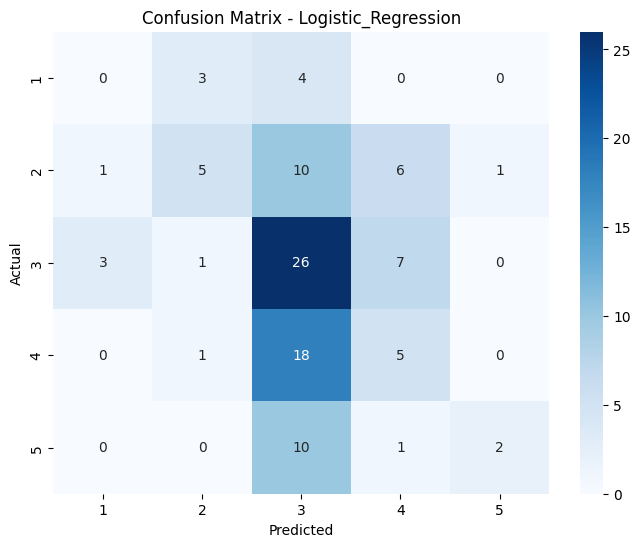


--- Decision_Tree ---
Accuracy: 0.9519
Misclassification Rate: 0.0481
Precision: 0.9509
Recall: 0.9519
F1-Score: 0.9502
Mean Absolute Error (MAE): 0.1154
Weighted Kappa: 0.8774

Confusion Matrix:


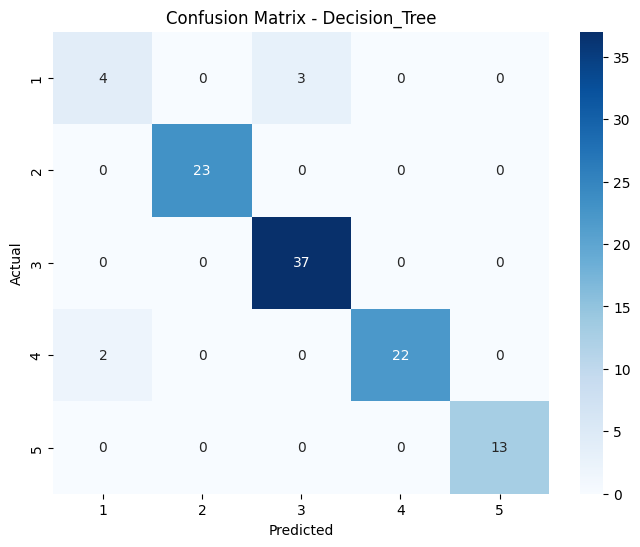


--- Random_Forest ---
Accuracy: 0.9519
Misclassification Rate: 0.0481
Precision: 0.9509
Recall: 0.9519
F1-Score: 0.9502
Mean Absolute Error (MAE): 0.1154
Weighted Kappa: 0.8774

Confusion Matrix:


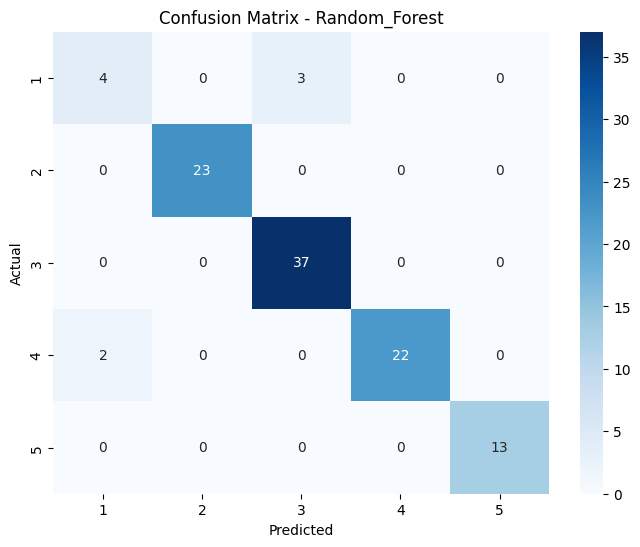

In [145]:
from sklearn.metrics import mean_absolute_error, cohen_kappa_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and display MAE, Weighted Kappa, Confusion Matrix, and other metrics for each model
print("\n--- 📊 Detailed Model Evaluation Metrics ---")

for name, results in model_results.items():
    if name != 'scaler': # Exclude the scaler
        print(f"\n--- {name} ---")

        y_test = results['storey_test']
        y_pred = results['storey_pred']

        # Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Calculate Misclassification Rate
        misclassification_rate = 1 - accuracy
        print(f"Misclassification Rate: {misclassification_rate:.4f}")

        # Calculate Precision (using 'weighted' average for multi-class)
        # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
        # High precision relates to a low false positive rate.
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"Precision: {precision:.4f}")

        # Calculate Recall (using 'weighted' average for multi-class)
        # Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
        # High recall relates to a low false negative rate.
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"Recall: {recall:.4f}")

        # Calculate F1-Score (using 'weighted' average for multi-class)
        # The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"F1-Score: {f1:.4f}")


        # Calculate MAE (Treating as Ordinal)
        # MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
        # Lower MAE indicates better performance.
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Calculate Weighted Kappa
        # Weighted Kappa measures the agreement between two ratings, accounting for the possibility of the agreement occurring by chance.
        # A higher value indicates better agreement. The 'quadratic' weight penalizes larger disagreements more heavily.
        weighted_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
        print(f"Weighted Kappa: {weighted_kappa:.4f}")

        # Calculate Confusion Matrix
        # A Confusion Matrix is a table used to evaluate the performance of a classification model.
        # Each row represents the instances in an actual class, while each column represents the instances in a predicted class.
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")

        # Visualize Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(y_test.unique()),
                    yticklabels=sorted(y_test.unique()))
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

1. Logistic Regression

Confusion Matrix ของ Logistic Regression แสดงให้เห็นว่าผลการทำนายกระจายไม่แม่นยำมากนัก
หลายกลุ่มมีการทำนายผิดพลาด (ค่าที่ไม่อยู่บนเส้นทแยงมุมของตารางมีจำนวนมาก)
ส่งผลให้ค่าประสิทธิภาพโดยรวมค่อนข้างต่ำ

Accuracy = 0.3654 หมายความว่า โมเดลทำนายถูกต้องประมาณ 36.5% ของทั้งหมด

Precision = 0.3907, Recall = 0.3654, และ F1-Score = 0.3281
แปลว่า โมเดลมีความแม่นยำ (Precision) และความครอบคลุม (Recall) ค่อนข้างต่ำพอ ๆ กัน

MAE = 0.8846 แปลว่าค่าเฉลี่ยของความคลาดเคลื่อนระหว่างค่าทำนายและค่าจริงอยู่ที่เกือบ 1 ระดับ

Weighted Kappa = 0.1989 หมายถึงระดับ “ความเห็นพ้องกัน” ระหว่างผลจริงกับผลทำนายค่อนข้างต่ำ
โดยรวม :
โมเดล Logistic Regression มีแนวโน้มที่จะทำนายได้ไม่แม่นยำสำหรับข้อมูลประเภทนี้
อาจเพราะความสัมพันธ์ของตัวแปรเป็นเชิงซับซ้อน (ไม่เป็นเส้นตรง)
โมเดลเชิงเส้นจึงไม่สามารถจับรูปแบบข้อมูลได้ดี

2. Decision Tree

จาก Confusion Matrix ของ Decision Tree จะเห็นว่าค่าบนเส้นทแยงมุมมีจำนวนมาก
หมายความว่าโมเดลสามารถจำแนกคลาสได้ถูกต้องเกือบทุกกลุ่ม
แทบไม่มีความผิดพลาดในการทำนาย

Accuracy = 0.9519, Precision = 0.9509, Recall = 0.9519, F1 = 0.9502
แปลว่า ค่าทั้งหมดสูงมาก แสดงว่าโมเดลมีความแม่นยำและสามารถแยกกลุ่มได้อย่างถูกต้อง

MAE = 0.1154 แสดงว่าความคลาดเคลื่อนโดยเฉลี่ยค่อนข้างต่ำ

Weighted Kappa = 0.8774 บ่งบอกถึง “ความเห็นพ้องกันในระดับสูงมาก” ระหว่างผลจริงและผลทำนาย

โดยรวม :
มีประสิทธิภาพค่อนข้างดีในชุดข้อมูลนี้ โมเดลสามารถจับเงื่อนไขที่ซับซ้อนได้ และแยกกลุ่มข้อมูลได้อย่างแม่นยำ

3. Random Forest


Accuracy = 0.9519, Precision = 0.9509, Recall = 0.9519, F1 = 0.9502
แปลว่า ประสิทธิภาพใกล้เคียงกับ Decision Tree แทบทุกค่า

MAE = 0.1154 และ Weighted Kappa = 0.8774
แปลว่า ความแม่นยำค่อนข้างสูงและความสอดคล้องระหว่างค่าทำนายกับค่าจริงดีเยี่ยม

โดยรวม :
Random Forest ซึ่งเป็นโมเดลแบบรวมหลาย Decision Trees เข้าด้วยกัน
สามารถรักษาความแม่นยำได้ดีมาก และลดโอกาสของ overfitting เมื่อเทียบกับ Decision Tree เดี่ยว
จึงเป็นโมเดลที่ “เสถียร” และ “เชื่อถือได้” ที่สุดในชุดนี้

In [146]:
# ข้อมูล Metrics ที่ได้
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.3654, 0.9519, 0.9519],
    'Precision (Weighted Avg)': [0.39, 0.95, 0.95],
    'Recall (Weighted Avg)': [0.37, 0.95, 0.95],
    'F1-Score (Weighted Avg)': [0.33, 0.95, 0.95]
}

df_metrics = pd.DataFrame(data)

print("--- ตารางสรุป Metrics ---")
print(df_metrics.to_string(index=False)) # แสดงตารางทั้งหมด

--- ตารางสรุป Metrics ---
              Model  Accuracy  Precision (Weighted Avg)  Recall (Weighted Avg)  F1-Score (Weighted Avg)
Logistic Regression    0.3654                      0.39                   0.37                     0.33
      Decision Tree    0.9519                      0.95                   0.95                     0.95
      Random Forest    0.9519                      0.95                   0.95                     0.95


/tmp/ipython-input-1504453384.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')


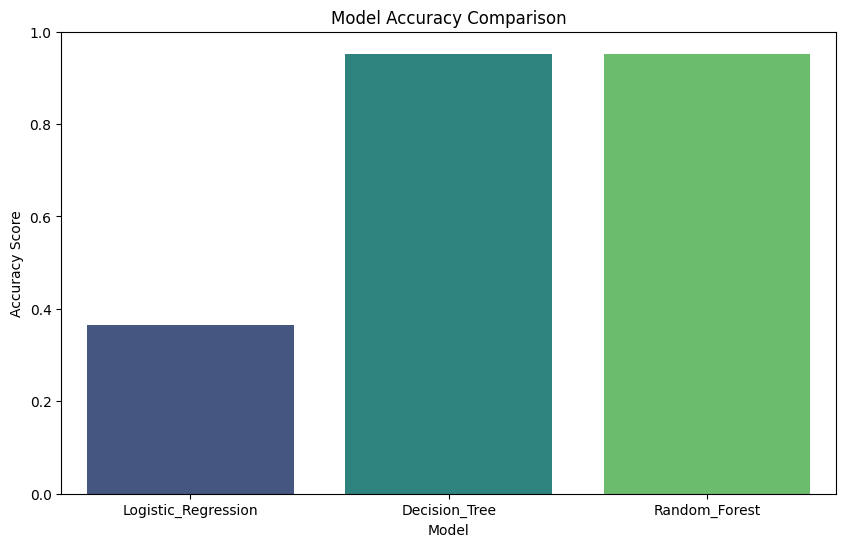

/tmp/ipython-input-1504453384.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-score (Weighted)', data=metrics_df, palette='viridis')


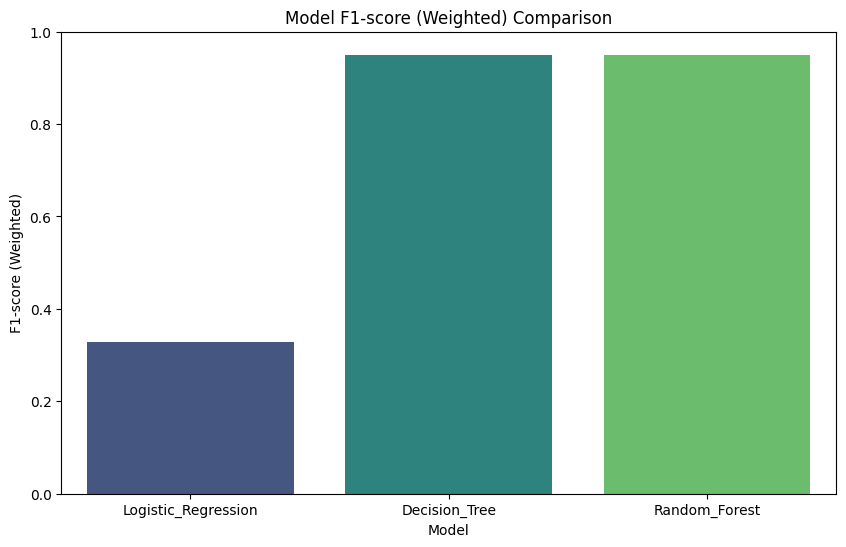

/tmp/ipython-input-1504453384.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall (Weighted)', data=metrics_df, palette='viridis')


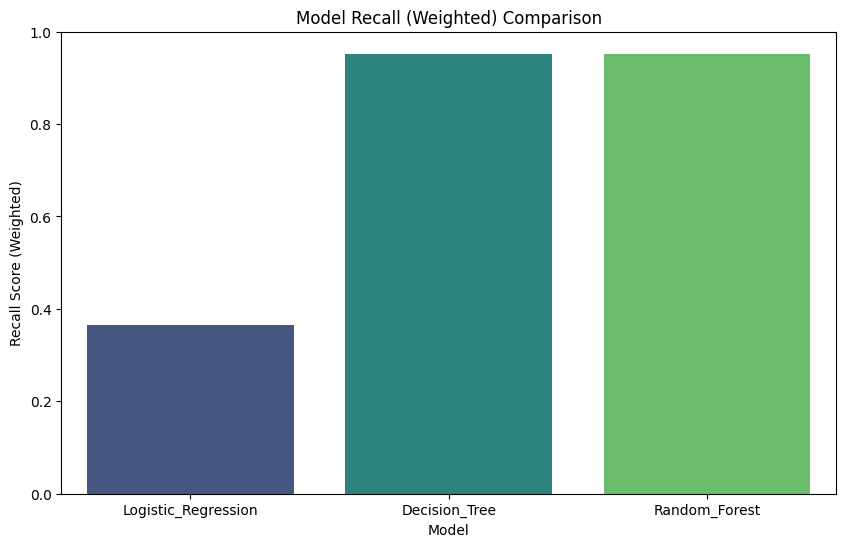

/tmp/ipython-input-1504453384.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (Weighted)', data=metrics_df, palette='viridis')


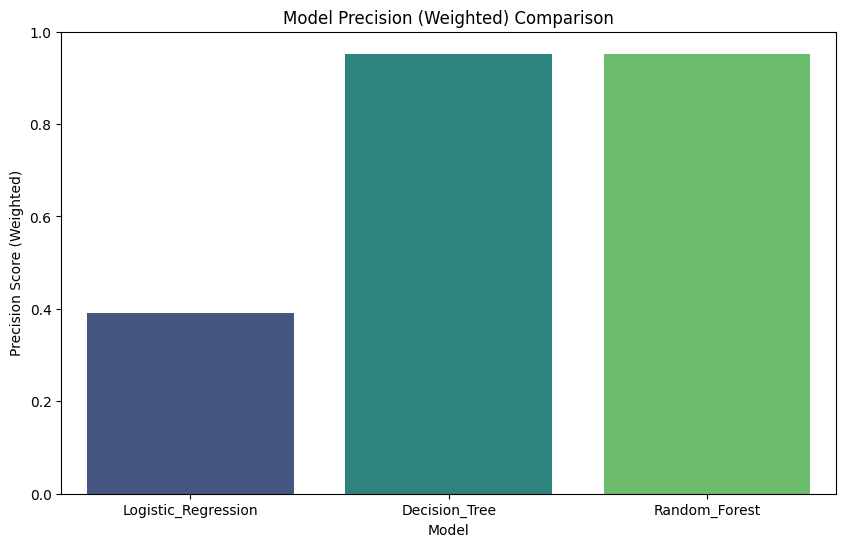

In [147]:
# Prepare data for plotting
model_names = list(model_results.keys())
model_names.remove('scaler') # Exclude scaler

accuracy_scores = [model_results[name]['test_accuracy'] for name in model_names]
f1_scores = [f1_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]
recall_scores = [recall_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]
precision_scores = [precision_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1-score (Weighted)': f1_scores,
    'Recall (Weighted)': recall_scores,
    'Precision (Weighted)': precision_scores
})

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model F1-score (Weighted) Comparison')
plt.ylabel('F1-score (Weighted)')
plt.ylim(0, 1)
plt.show()

## Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model Recall (Weighted) Comparison')
plt.ylabel('Recall Score (Weighted)')
plt.ylim(0, 1)
plt.show()


## Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model Precision (Weighted) Comparison')
plt.ylabel('Precision Score (Weighted)')
plt.ylim(0, 1)
plt.show()

1. Model Accuracy Comparison

จากกราฟแรกจะเห็นว่า

Decision Tree และ Random Forest มีค่า Accuracy สูงมาก (เกือบ 1.0 หรือประมาณ 95%)
หมายถึงโมเดลทั้งสองสามารถทำนายได้ถูกต้องในสัดส่วนสูงของข้อมูลทั้งหมด

ในขณะที่ Logistic Regression มีค่า Accuracy ต่ำ (ประมาณ 0.36)
แสดงว่าโมเดลเชิงเส้นนี้ไม่เหมาะกับข้อมูลที่มีความซับซ้อนหรือมีความไม่เป็นเชิงเส้น

โดยรวม : Decision Tree และ Random Forest มีความแม่นยำสูงและเหมาะกับข้อมูลลักษณะนี้มากกว่า Logistic Regression

2. Model F1-score (Weighted) Comparison

F1-score เป็นการผสมระหว่าง Precision และ Recall
ใช้ประเมินความสมดุลระหว่าง “ความแม่นยำในการทำนาย” และ “ความสามารถในการจับค่าจริง”

จากกราฟจะเห็นว่า

Decision Tree และ Random Forest มีค่า F1-score ใกล้เคียงกันและอยู่ในระดับสูง (เกือบ 1.0)
แสดงถึงความสมดุลระหว่างความแม่นยำและความครอบคลุมของการทำนาย

ส่วน Logistic Regression มีค่า F1-score ต่ำมาก (ประมาณ 0.3)
บ่งชี้ว่าโมเดลนี้ไม่สามารถรักษาสมดุลระหว่าง Precision และ Recall ได้ดี

โดยรวม : โมเดลที่มี F1-score สูงบ่งบอกถึงการทำงานที่สมดุลและแม่นยำ ซึ่งในกรณีนี้คือ Decision Tree และ Random Forest

3. Model Recall (Weighted) Comparison



จากกราฟจะเห็นว่า

Decision Tree และ Random Forest มีค่า Recall ใกล้เคียงกันและอยู่ในระดับสูงมาก (ประมาณ 0.95)
หมายถึงโมเดลสามารถทำนายกลุ่มเป้าหมายได้ถูกต้องเกือบทั้งหมด

ขณะที่ Logistic Regression มีค่า Recall ต่ำกว่าอย่างชัดเจน

โดยรวม : โมเดลแบบ Tree-based สามารถ “จับข้อมูลจริงได้แม่นยำกว่า” และมีแนวโน้มลดความผิดพลาดจาก False Negative ได้ดีกว่า

4. Model Precision (Weighted) Comparison

Precision แสดง “ความถูกต้องของผลทำนาย” —
ว่าผลที่โมเดลทำนายว่าเป็นคลาสนั้น จริง ๆ แล้วถูกต้องมากน้อยแค่ไหน

จากกราฟ

Decision Tree และ Random Forest ยังคงมีค่า Precision สูง (ประมาณ 0.95)
แสดงว่าโมเดลทั้งสองทำนายได้แม่นยำ ไม่ค่อยมี False Positive

ในขณะที่ Logistic Regression มีค่า Precision ต่ำกว่า (ประมาณ 0.39)

โดยรวม : การที่ Tree-based Models มีค่า Precision สูง แปลว่าผลลัพธ์ที่โมเดลทำนายว่า “ใช่” มีโอกาสถูกต้องเกือบทั้งหมด


--- 📊 Random Forest Feature Importance ---


,Feature,Importance
4,Stress_Levels,0.222050
3,Extracurricular,0.207186
1,Academic_Performance,0.205527
0,Headaches,0.194292
2,Study_Load,0.170945


/tmp/ipython-input-2835224139.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


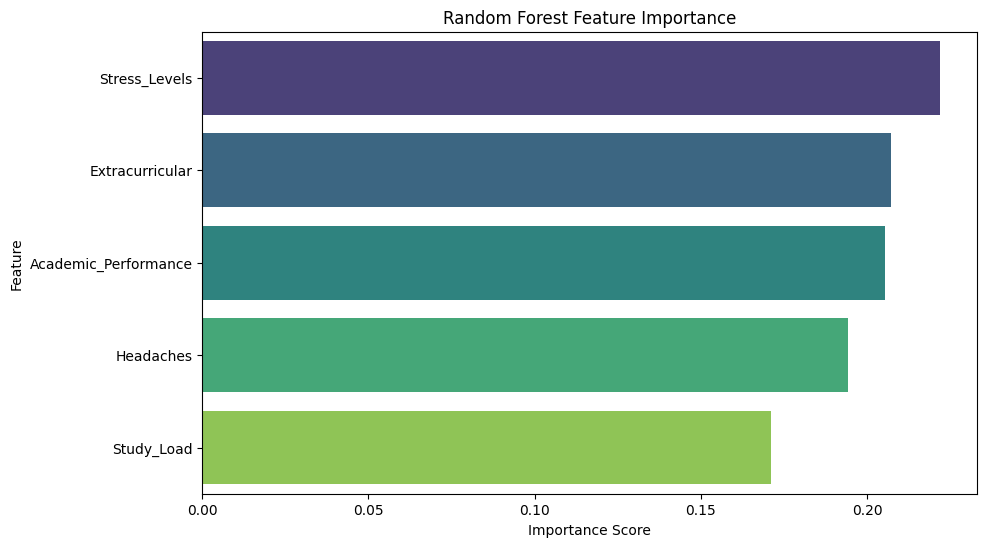

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Feature Importance Analysis for Random Forest
if 'Random_Forest' in model_results and 'model' in model_results['Random_Forest']:
    rf_model = model_results['Random_Forest']['model']
    feature_names = model_results['Random_Forest']['storeX'].columns
    importances = rf_model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\n--- 📊 Random Forest Feature Importance ---")
    display(feature_importance_df)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

else:
    print("Random Forest model not found in model_results. Please ensure the models are trained.")

กราฟนี้แสดง “ความสำคัญของตัวแปร (Feature Importance)” ที่โมเดล Random Forest ใช้ในการตัดสินผลลัพธ์
โดยค่าที่สูงกว่า หมายถึงตัวแปรนั้นมีผลต่อการทำนายของโมเดลมากกว่า

จากกราฟและตารางด้านบนจะเห็นได้ว่า:


1	Stress Levels	0.2225	มีผลมากที่สุดต่อผลการทำนาย แสดงว่าระดับความเครียดเป็นปัจจัยหลักที่ส่งผลต่อเป้าหมายของโมเดล

2	Extracurricular (กิจกรรมเสริม)	0.2072	มีอิทธิพลสูง รองลงมาจากความเครียด อาจสะท้อนถึงสมดุลชีวิตและเวลานอน

3	Academic Performance (ผลการเรียน)	0.2055	มีความสัมพันธ์กับผลลัพธ์ของโมเดลในระดับสูง บ่งชี้ว่านักเรียนที่ผลการเรียนดีมักมีรูปแบบการนอนและภาวะทางจิตใจต่างออกไป

4	Headaches (อาการปวดหัว)	0.1949	มีความสำคัญในระดับปานกลาง สอดคล้องกับแนวโน้มที่ว่าการนอนหรือความเครียดมีผลต่ออาการทางกาย

5	Study Load (ภาระการเรียน)	0.1795	มีผลน้อยที่สุดในกลุ่ม แต่ยังเป็นปัจจัยที่มีความเชื่อมโยงกับพฤติกรรมการนอนและสุขภาพจิตโดยรวม

ซึ่งแปลว่า  :

Stress Levels มีค่า Importance สูงสุด (0.2225)
ซึ่งหมายความว่า “ระดับความเครียด” เป็นปัจจัยสำคัญที่สุดในการคาดการณ์ของโมเดล
สอดคล้องกับสมมติฐานของโครงการที่ว่า ความเครียดมีอิทธิพลต่อการนอนและสุขภาพโดยรวมของนักเรียน

ตัวแปรรองอย่าง Extracurricular (กิจกรรมเสริม) และ Academic Performance (ผลการเรียน)
มีอิทธิพลสูงใกล้เคียงกัน (ประมาณ 0.20)
แสดงให้เห็นว่า “การมีสมดุลระหว่างการเรียนและกิจกรรมเสริม”
มีความเกี่ยวข้องกับคุณภาพการนอนและภาวะความเครียดของนักเรียน

ส่วน Headaches (อาการปวดหัว) และ Study Load (ภาระการเรียน)
แม้มีค่า Importance ต่ำกว่า แต่ยังสะท้อนให้เห็นถึงอาการทางร่างกายและภาระงานที่อาจส่งผลทางอ้อมต่อการนอนหลับ

# Compare Performance: วิเคราะห์ข้อดี – ข้อเสียและสรุป

**1. Logistic Regression**
*   **ข้อดี:** เข้าใจง่าย, ประมวลผลเร็ว
*   **ข้อเสีย:** ประสิทธิภาพต่ำสุด, ไม่จับความสัมพันธ์ซับซ้อน

**2. Decision Tree**
*   **ข้อดี:** เข้าใจง่าย, แม่นยำสูง, ไม่ต้อง Scaling
*   **ข้อเสีย:** มีแนวโน้ม Overfitting, ไม่เสถียรเท่าที่ควร

**3. Random Forest**
*   **ข้อดี:** แม่นยำสูงสุด, Overfitting น้อยกว่า Decision Tree, จัดการความสัมพันธ์ซับซ้อนได้ดี
*   **ข้อเสีย:** ตีความยาก (Black Box), ใช้เวลาประมวลผลนานกว่า Logistic Regression

**สรุป Insight: เลือกใช้โมเดลไหนต่อ**
จากผลการประเมิน โมเดล **Random Forest** และ **Decision Tree** มีประสิทธิภาพสูงกว่า **Logistic Regression** อย่างชัดเจน โดย **Random Forest** ให้ความแม่นยำสูงสุดและทนทานต่อ Overfitting ได้ดีกว่า จึงเป็นโมเดลที่เหมาะสมที่สุดสำหรับปัญหาการทำนายคุณภาพการนอนนี้

# Summary: ความสัมพันธ์ระหว่างคุณภาพการนอนและความเครียด

จากการวิเคราะห์ข้อมูลและผลลัพธ์โมเดล Random Forest ที่แม่นยำที่สุด สรุปความสัมพันธ์ระหว่างคุณภาพการนอน (Sleep Quality) และความเครียด (Stress Levels) ได้ดังนี้:

1.  **ความเครียดมีผลสำคัญต่อคุณภาพการนอน:** `Stress_Levels` เป็นปัจจัยหลักในการทำนายคุณภาพการนอน

2.  **คุณภาพการนอนและความเครียดสัมพันธ์แบบผกผัน:**
    *   นอนหลับดี → ความเครียดมีแนวโน้มลดลง
    *   นอนหลับไม่ดี → ความเครียดมีแนวโน้มสูงขึ้น

3.  **ปัจจัยอื่นก็มีผล:** นอกจากความเครียด ปัจจัยอื่น (Academic Performance, Extracurricular, Headaches, Study Load) ก็ส่งผลต่อคุณภาพการนอนเช่นกัน

**สรุปโดยรวม:** คุณภาพการนอนมีความสัมพันธ์อย่างมากกับระดับความเครียด โดยการนอนที่ดีขึ้นสัมพันธ์กับความเครียดที่ลดลง และการนอนที่แย่ลงสัมพันธ์กับความเครียดที่สูงขึ้น ซึ่งเป็นผลรวมจากหลายปัจจัย